In [1]:
import time
script_start_time = time.time()

import pandas as pd
import numpy as np
import json

#pd.set_option('display.max_rows', 600)
#pd.set_option('displayay.max_columns', 50)
import warnings
warnings.filterwarnings('ignore')

#data_path = "home/LSDA"

In [31]:
#print('%0.2f min: Start loading data'%((time.time() - script_start_time)/60))

train={}
test={}
validation={}
with open('validation.json') as json_data:     ##########   run on train first to get right labels in next block, then rerun this with validation
    train= json.load(json_data)
"""with open('test.json') as json_data:
    test= json.load(json_data)
with open('validation.json') as json_data:
    validation = json.load(json_data)
"""
print('Train No. of images: %d'%(len(train['images'])))
#print('Test No. of images: %d'%(len(test['images'])))
#print('Validation No. of images: %d'%(len(validation['images'])))

# JSON TO PANDAS DATAFRAME
# train data
train_img_url=train['images']
train_img_url=pd.DataFrame(train_img_url)
train_ann=train['annotations']
train_ann=pd.DataFrame(train_ann)
train=pd.merge(train_img_url, train_ann, on='imageId', how='inner')

# test data
#test=pd.DataFrame(test['images'])
"""
# Validation Data
val_img_url=validation['images']
val_img_url=pd.DataFrame(val_img_url)
val_ann=validation['annotations']
val_ann=pd.DataFrame(val_ann)
validation=pd.merge(val_img_url, val_ann, on='imageId', how='inner')

, 'Test': test, 'Validation': validation
"""
datas = {'Train': train}
for data in datas.values():
    data['imageId'] = data['imageId'].astype(np.uint32)

#print('%0.2f min: Finish loading data'%((time.time() - script_start_time)/60))
#print('='*50)

Train No. of images: 9897


In [3]:
#dont rerun?

#print('%0.2f min: Start converting label'%((time.time() - script_start_time)/60))
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(train['labelId'])
#validation_label = mlb.transform(validation['labelId'])
#dummy_label_col = list(mlb.classes_)
#dummy_label_col = list(range(1,228))
#print('%0.2f min: Finish converting label'%((time.time() - script_start_time)/60))
#,validation_label , test
#for data in [train_label]:
#    print(data.shape)

# v = train['labelId'].values


MultiLabelBinarizer(classes=None, sparse_output=False)

In [5]:
train_label = mlb.transform(train['labelId'])

In [25]:
#get csv and txt support file
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
d = np.loadtxt("transf.txt", delimiter="\t")
#print(d.shape[0])

#data_pred = np.genfromtxt("1kval10k.csv", delimiter=',')     ##########  
data_pred = np.genfromtxt("fval100k.csv", delimiter=',')     ##########   
#data_pred.shape[1]
prob = data_pred[:,1:]
t = .3       #########
temp = prob > t
pred = temp.astype(int)
#print(pred[0])
sample = [int(i) for i in data_pred[:,0]]
sample = [x - 1 for x in sample]
size = len(sample)
print(t)
print('%0.2f min: Start converting label'%((time.time() - script_start_time)/60))

groundtruth = np.zeros((size,228))
for j in range(d.shape[0]):
    groundtruth[:,int(d[j,0]-1)] = train_label[sample,int(d[j,1]-1)]
#proper_label[]

print('%0.2f min: Finish converting label'%((time.time() - script_start_time)/60))

#print(np.equal(groundtruth[0],pred[0]))

print(precision_score(groundtruth,pred,average='samples'))

print(recall_score(groundtruth,pred,average='samples'))
#f1 score
print(f1_score(groundtruth,pred,average='samples'))


0.3
59.97 min: Start converting label
59.97 min: Finish converting label
0.372381645546
0.334405220079
0.296332380522


In [11]:
train_label.shape
len(sample)

39706

In [33]:
print(groundtruth.shape)
print(len(sample))
print(train_label.shape)
type(train['labelId'])

(1000, 228)
1000
(9897, 225)


pandas.core.series.Series

In [28]:
f1 = 0
bestf1 = 0
y = []
bestt =0
x = []
rs = []
ps = []
for t in np.arange(0.1,0.51,0.001):    ##########
    prob = data_pred[:,1:]
    #t = .4
    temp = prob > t
    pred = temp.astype(int)
    #print(pred[0])
    sample = [int(i) for i in data_pred[:,0]]
    sample = [x - 1 for x in sample]
    size = len(sample)
    #print(t)


    groundtruth = np.zeros((size,228))
    for j in range(d.shape[0]):
        groundtruth[:,int(d[j,0]-1)] = train_label[sample,int(d[j,1]-1)]
    #proper_label[]
    f1 = f1_score(groundtruth,pred,average='samples')
    p=precision_score(groundtruth,pred,average='samples')
    r=recall_score(groundtruth,pred,average='samples')
    x.append(t)
    y.append(f1)
    ps.append(p)
    rs.append(r)
    if f1>bestf1:
        bestf1 = f1
        bestt =t
        
print('best t:',bestt, 'f1:',bestf1)

best t: 0.291 f1: 0.297768633561


No handles with labels found to put in legend.


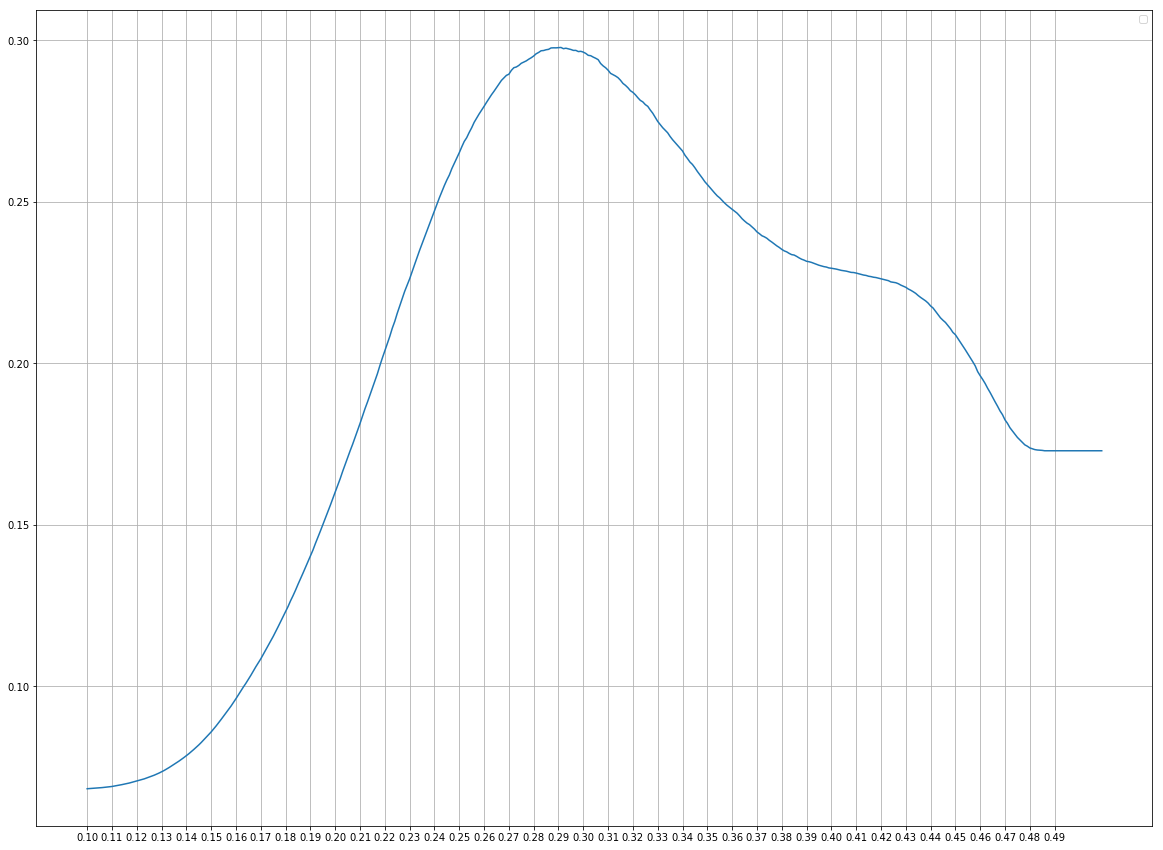

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

plt.plot(x, y)
#plt.plot(x, ps)
#plt.plot(x, rs)
plt.xticks(np.arange(0.1, 0.5, step=0.01))
plt.grid()
#plt.legend()
plt.show()

best t: 0.299 f1: 0.307952413192


No handles with labels found to put in legend.


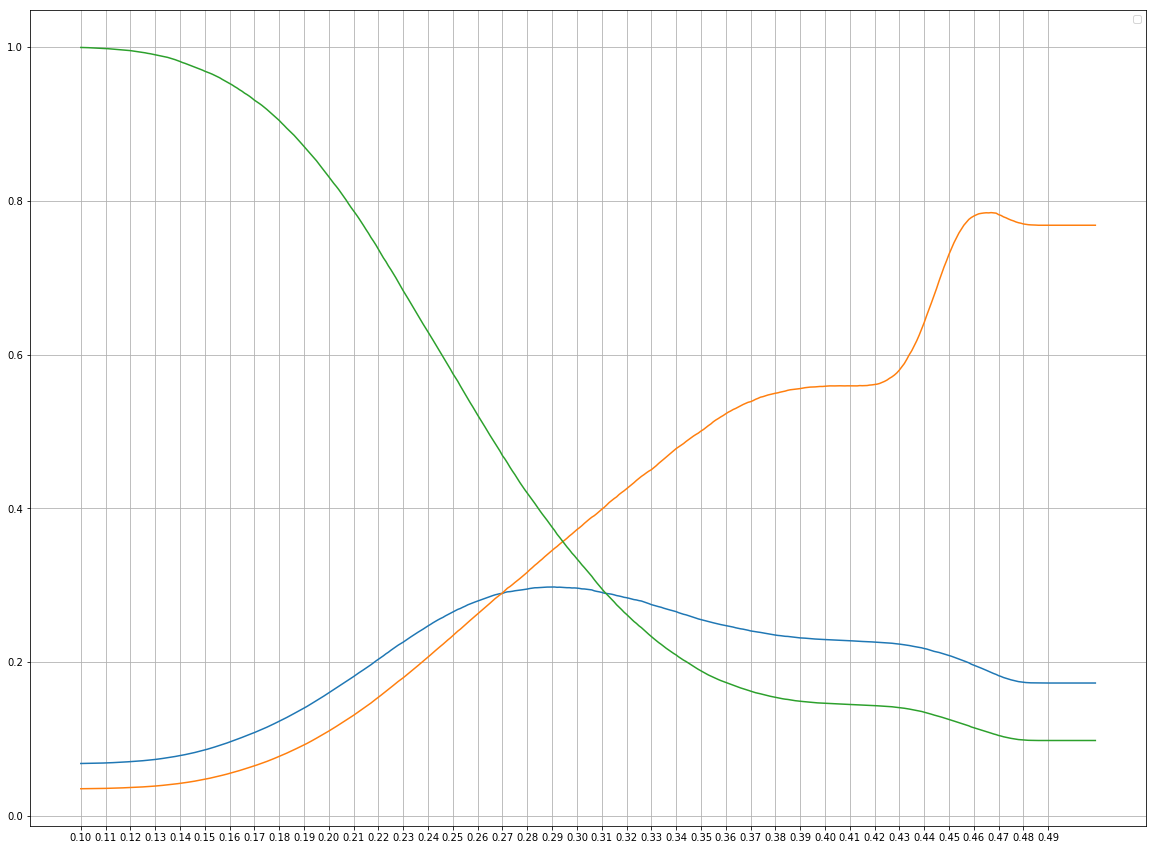

In [33]:
plt.plot(x, y)
plt.plot(x, ps)
plt.plot(x, rs)
plt.xticks(np.arange(0.1, 0.5, step=0.01))
plt.grid()
plt.legend()
plt.show()
